In [5]:
# Get the dataset 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

In [11]:
import tensorflow as tf
from tensorflow import keras

In [6]:
# scale the features -> all are numeric

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Sequential and Non Sequential Models

In [25]:
# Sequential model with one output

model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
# one output
keras.layers.Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 0.8560 - val_loss: 0.6121
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6721 - val_loss: 0.5188
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5082 - val_loss: 0.4781
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4648 - val_loss: 0.4569
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4544 - val_loss: 0.4503
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4463 - val_loss: 0.4361
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4354 - val_loss: 0.4328
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4304 - val_loss: 0.4248
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4263 - val_loss: 0.4258
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4249 - val_loss: 0.4256

In [ ]:
# Non Sequential Model 1 

input_ = keras.layers.Input(shape=X_train.shape[1:])
# input to this layer is input
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
# input to this layer is hidden1 layer
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# input to this layer is concatenated input and hidden 2, so there is a short path between input output layer
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])




In [15]:
# Non Sequential Model 2

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           930         ['dense_4[0][0]']                
                                                                                            

In [16]:
# since the above model requires two inputs, X must be broken to two, including in validation

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


C:\Users\91760\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9527 - val_loss: 1.0421
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9122 - val_loss: 0.8496
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7709 - val_loss: 0.7469
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6925 - val_loss: 0.6834
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6386 - val_loss: 0.6325
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5995 - val_loss: 0.5947
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5692 - val_loss: 0.5661
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5462 - val_loss: 0.5425
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5273 - val_loss: 0.5243
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5134 - val_loss: 0.5118

In [19]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output,
aux_output])
# two outputs, so individual loss function; if not mentioned by default will add up equally
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1],
optimizer="sgd")


In [20]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8416 - main_output_loss: 0.7185 - aux_output_loss: 1.9495 - val_loss: 0.5301 - val_main_output_loss: 0.4654 - val_aux_output_loss: 1.1128
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5245 - main_output_loss: 0.4682 - aux_output_loss: 1.0312 - val_loss: 0.4972 - val_main_output_loss: 0.4473 - val_aux_output_loss: 0.9456
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4894 - main_output_loss: 0.4451 - aux_output_loss: 0.8880 - val_loss: 0.4841 - val_main_output_loss: 0.4443 - val_aux_output_loss: 0.8422
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - main_output_loss: 0.4347 - aux_output_loss: 0.7969 - val_loss: 0.4801 - val_main_output_loss: 0.4472 - val_aux_output_loss: 0.7767
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4596 - main_output_loss: 0.4292 - aux_output_loss: 0.7331 - val_loss

In [21]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])


162/162 [==============================] - 0s 1ms/step - loss: 0.3754 - main_output_loss: 0.3610 - aux_output_loss: 0.5053


In [22]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])


In [23]:
model.save("my_keras_model.h5")

# Using Callbacks 

In [27]:
# list of objects keras will call at beginning and end of training, epoch or batch

# ModelCheckpoint: Saves model at different checkpoints
model.compile(loss="mean_squared_error", optimizer="sgd")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks= [checkpoint_cb])




Epoch 1/10
363/363 [==============================] - 0s 707us/step - loss: 0.9031
Epoch 2/10
363/363 [==============================] - 0s 702us/step - loss: 0.6284
Epoch 3/10
363/363 [==============================] - 0s 620us/step - loss: 0.4846
Epoch 4/10
363/363 [==============================] - 0s 609us/step - loss: 0.4596
Epoch 5/10
363/363 [==============================] - 0s 613us/step - loss: 0.4407
Epoch 6/10
363/363 [==============================] - 0s 591us/step - loss: 0.4372
Epoch 7/10
363/363 [==============================] - 0s 576us/step - loss: 0.4238
Epoch 8/10
363/363 [==============================] - 0s 676us/step - loss: 0.4187
Epoch 9/10
363/363 [==============================] - 0s 706us/step - loss: 0.4192
Epoch 10/10
363/363 [==============================] - 0s 567us/step - loss: 0.4079


In [28]:
# early stopping while saving the best model

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best
model

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4073 - val_loss: 0.4154
Epoch 2/10
363/363 [==============================] - 0s 886us/step - loss: 0.4010 - val_loss: 0.3974
Epoch 3/10
363/363 [==============================] - 0s 821us/step - loss: 0.4004 - val_loss: 0.3954
Epoch 4/10
363/363 [==============================] - 0s 857us/step - loss: 0.3930 - val_loss: 0.3946
Epoch 5/10
363/363 [==============================] - 0s 752us/step - loss: 0.3898 - val_loss: 0.3897
Epoch 6/10
363/363 [==============================] - 0s 734us/step - loss: 0.3869 - val_loss: 0.3934
Epoch 7/10
363/363 [==============================] - 0s 977us/step - loss: 0.3868 - val_loss: 0.3894
Epoch 8/10
363/363 [==============================] - 0s 762us/step - loss: 0.3812 - val_loss: 0.3874
Epoch 9/10
363/363 [==============================] - 0s 743us/step - loss: 0.3816 - val_loss: 0.3780
Epoch 10/10
363/363 [==============================] - 0s 776us/step - loss: 0.3987 

In [29]:
# reverted to epoch 9  
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 657us/step - loss: 0.3780


0.3779544234275818

### early stopping with paitence

In [30]:
# paitence -> number of epochs with no improvement in validation

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
validation_data=(X_valid, y_valid),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 945us/step - loss: 0.3741 - val_loss: 0.3907
Epoch 2/100
363/363 [==============================] - 0s 871us/step - loss: 0.3732 - val_loss: 0.3793
Epoch 3/100
363/363 [==============================] - 0s 710us/step - loss: 0.3853 - val_loss: 0.3784
Epoch 4/100
363/363 [==============================] - 0s 831us/step - loss: 0.3749 - val_loss: 0.3788
Epoch 5/100
363/363 [==============================] - 0s 713us/step - loss: 0.3707 - val_loss: 0.3723
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3696 - val_loss: 0.3697
Epoch 7/100
363/363 [==============================] - 0s 795us/step - loss: 0.3672 - val_loss: 0.3715
Epoch 8/100
363/363 [==============================] - 0s 871us/step - loss: 0.3661 - val_loss: 0.3679
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3607 - val_loss: 0.3656
Epoch 10/100
363/363 [==============================] - 0s 780us/step - loss:

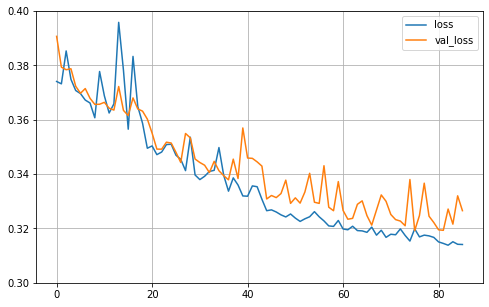

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.3, 0.4) # set the vertical range to [0-1]
plt.show()

In [34]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] /logs["loss"]))


## Tensorboard

In [37]:
import os
# root directory for tensorboard logs
root_logdir = os.path.join(os.curdir, "my_logs")


# add date time to avoid overwrite

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() 



In [38]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
validation_data=(X_valid, y_valid),
callbacks=[tensorboard_cb])


Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3160 - val_loss: 0.3223
Epoch 2/30
363/363 [==============================] - 0s 845us/step - loss: 0.3169 - val_loss: 0.3264
Epoch 3/30
363/363 [==============================] - 0s 848us/step - loss: 0.3176 - val_loss: 0.3222
Epoch 4/30
363/363 [==============================] - 0s 819us/step - loss: 0.3155 - val_loss: 0.3231
Epoch 5/30
363/363 [==============================] - 0s 891us/step - loss: 0.3161 - val_loss: 0.3213
Epoch 6/30
363/363 [==============================] - 0s 845us/step - loss: 0.3217 - val_loss: 0.3251
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3184 - val_loss: 0.3220
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3272 - val_loss: 0.3280
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3159 - val_loss: 0.3196
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3146 - val_lo

### Launch Tensorboard

In [39]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006
